# Morphology Module: Part 2 for CNS tutorial
-----

*Load morphologies that were downloaded, analyze them, and compare species.*

For the first part of the tutorial, the user needs to create a *virtual lab* and save the URL of the lab. This will be used to authenticate the access of the user and allow access to the data. Once authentication is verified, the user will be able to access the data and search through it. We will select data by their species. We will download XXX mouse morphologies from temporal association cortex, and XXX human morpohlogies from temporal cortex. We saved these neurons locally in two different folders. The data will now be used for the analysis between the two species. 

## 2.1 Use NeuroM to load morphologies

In [1]:
import neurom as nm
from neurom import view
from matplotlib import pylab as plt
import numpy as np

In [2]:
Rat_morphologies = nm.load_morphologies('Rat/')

In [3]:
Mouse_morphologies = nm.load_morphologies('Mouse/')

## 2.2 Plot morphologies

In [4]:
rat_neuron = list(Rat_morphologies.morphologies)[0]

mouse_neuron = list(Mouse_morphologies.morphologies)[0]

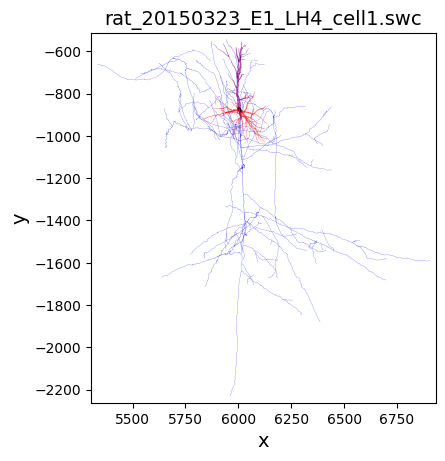

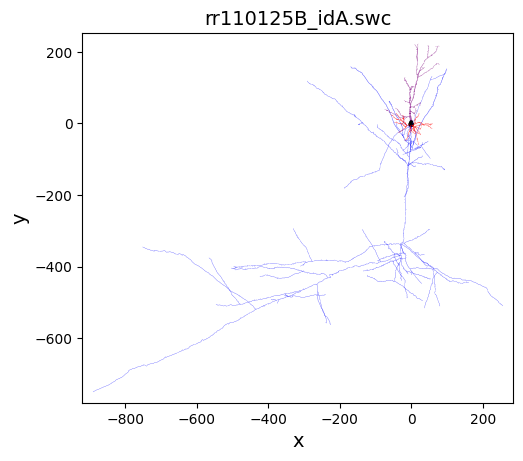

In [5]:
view.plot_morph(rat_neuron)
view.plot_morph(mouse_neuron)

Text(0.5, 1.0, 'Mouse morphology')

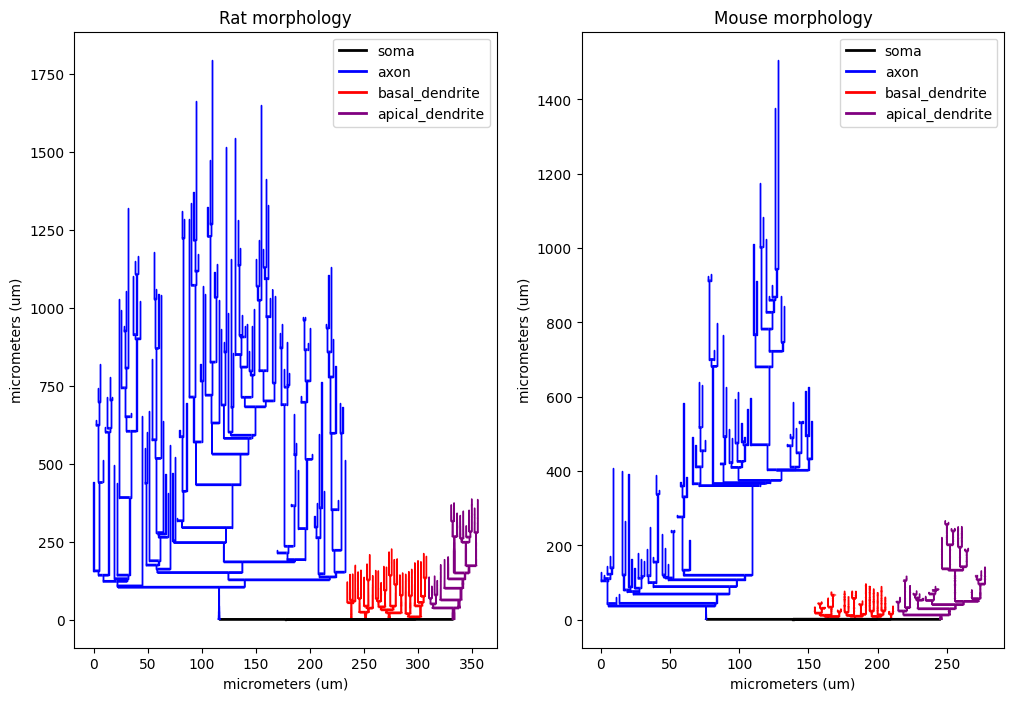

In [6]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121)
view.plot_dendrogram(rat_neuron, ax=ax)
ax.set_title("Rat morphology")
ax = fig.add_subplot(122)
view.plot_dendrogram(mouse_neuron, ax=ax)
ax.set_title("Mouse morphology")

## 2.3 Morphological Analysis

### Morphological Features full list

**Morphology**

* aspect_ratio
* circularity
* length_fraction_above_soma
* max_radial_distance
* neurite_volume_density
* number_of_neurites
* number_of_sections_per_neurite
* section_bif_radial_distances
* section_radial_distances
* section_term_radial_distances
* segment_radial_distances
* shape_factor
* sholl_crossings
* sholl_frequency
* soma_radius
* soma_surface_area
* soma_volume
* total_area_per_neurite
* total_depth
* total_height
* total_length_per_neurite
* total_volume_per_neurite
* total_width
* trunk_angles
* trunk_angles_from_vector
* trunk_angles_inter_types
* trunk_origin_azimuths
* trunk_origin_elevations
* trunk_origin_radii
* trunk_section_lengths
* trunk_vectors
* volume_density

**Neurite**

* bifurcation_partitions
* diameter_power_relations
* local_bifurcation_angles
* max_radial_distance
* number_of_bifurcations
* number_of_forking_points
* number_of_leaves
* number_of_sections
* number_of_segments
* partition_asymmetry
* partition_asymmetry_length
* partition_pairs
* principal_direction_extents
* remote_bifurcation_angles
* section_areas
* section_bif_branch_orders
* section_bif_lengths
* section_bif_radial_distances
* section_branch_orders
* section_end_distances
* section_lengths
* section_path_distances
* section_radial_distances
* section_strahler_orders
* section_taper_rates
* section_term_branch_orders
* section_term_lengths
* section_term_radial_distances
* section_tortuosity
* section_volumes
* segment_areas
* segment_lengths
* segment_meander_angles
* segment_midpoints
* segment_path_lengths
* segment_radial_distances
* segment_radii
* segment_taper_rates
* segment_volumes
* sibling_ratios
* terminal_path_lengths
* total_area
* total_length
* total_volume
* volume_density

### Morphological Analysis Dataframe 

In [7]:
from neurom.apps import morph_stats, morph_check

In [8]:
conf = nm.apps.morph_stats.get_config(nm.apps.morph_stats.EXAMPLE_STATS_CONFIG, nm.apps.morph_stats.EXAMPLE_STATS_CONFIG)

In [9]:
conf = {'neurite': {'section_lengths': ['max', 'sum'],
                    'number_of_sections': ['sum'],
                    'section_branch_orders': ['max']},
        'neurite_type': ['APICAL_DENDRITE', 'BASAL_DENDRITE'],
        'morphology': {'soma_radius': ['mean']}}

In [10]:
df_R = morph_stats.extract_dataframe(Rat_morphologies, conf)

In [11]:
df_M = morph_stats.extract_dataframe(Mouse_morphologies, conf)

In [12]:
df_R.compare(df_M)

property                              \
                             name                               
                             self                       other   
0   rat_20150323_E1_LH4_cell1.swc           rr110125B_idA.swc   
1            rp120510_P-2_idA.swc  rat_20140212_RH4_cell1.swc   
2            rp120430_P-2_idC.swc        rp120510_P-2_idA.swc   
3                 C170897A-P3.swc  rat_20150217_LH3_cell2.swc   
4      rat_20150217_LH3_cell1.swc             C170897A-P3.swc   
5                 C170897A-P2.swc  rat_20150217_LH3_cell1.swc   
6                 C031000B-P3.swc        sm100506a1-4_idE.swc   
7        sm110120c1-2_INT_idD.swc             C220797A-P3.swc   
8   rat_20151211_E2_LH3_cell1.swc             C031000B-P3.swc   
9                 C260897C-P4.swc    sm110120c1-2_INT_idD.swc   
10     rat_20141016_LH3_cell2.swc        rp120531_P_2_idA.swc   
11     rat_20150131_LH2_cell2.swc  rat_20150131_LH2_cell3.swc   
12                C190898A-P2.swc          mtC221001A_idA.swc   
13               rat_20082013.swc          rp100426-2_idC.swc   
14     rat_20150120_LH1_cell3.swc  rat_20141024_LH4_cell1.swc   
15             rp100426-2_idC.swc             C180298A-P2.swc   
16       sm110131a1-3_INT_idA.swc             C240797B-P3.swc   
17                C180298A-P2.swc             C280199C-P1.swc   
18                C240797B-P1.swc    sm101102a1-8_INT_idA.swc   
19       sm110127b1-3_INT_idA.swc    sm110127b1-3_INT_idB.swc   

       apical_dendrite                                               \
   max_section_lengths             sum_section_lengths                
                  self       other                self        other   
0           116.560722   84.281784         1854.797590  1137.433864   
1           178.201660  147.010422         2263.190363  2014.926224   
2           299.009705  118.005150         2633.997607  1498.684653   
3           206.162231  157.605133         1363.289311  1748.429781   
4           207.517807  136.520630         1725.027897   902.770148   
5           217.235825  137.418289         1700.435794  1142.313399   
6           246.780701  145.396515         1889.908377  1631.948018   
7           208.090744  146.523911         1423.123428  1316.170910   
8           252.685974  163.418213         3933.963167  1251.497406   
9           162.403107  137.797699         2049.095135   942.392298   
10          147.098099  174.860657         3404.284668  1008.656176   
11          213.481049  175.669312         3694.057330  1661.975340   
12          141.395889  116.174797         2904.083353   810.504564   
13          146.110962  110.804710         2565.307190  1295.300401   
14          138.027924  193.824066         1796.570006  1572.598835   
15          167.328156   93.249039         1956.056276  1238.813120   
16          132.321136  118.348648         2596.005147  1461.146284   
17          140.817032   99.327263         1870.753743  1141.652549   
18          154.894058  115.585320         3205.442736  2169.256856   
19          190.616516  141.173431         2476.535188  1967.996296   

                                                                 \
   sum_number_of_sections       max_section_branch_orders         
                     self other                      self other   
0                    33.0  55.0                       9.0   8.0   
1                    35.0  45.0                       8.0  11.0   
2                    40.0  35.0                      11.0   8.0   
3                    21.0  39.0                       7.0  13.0   
4                    29.0  21.0                       9.0   7.0   
5                     NaN   NaN                       7.0   9.0   
6                    36.0  29.0                       NaN   NaN   
7                    39.0  37.0                       7.0  13.0   
8                    59.0  36.0                      12.0   9.0   
9                    33.0  39.0                      13.0   7.0   
10                   57.

### Morphological Analysis Examples

In [13]:
section_lengthsR = nm.get('section_lengths', Rat_morphologies, neurite_type=nm.BASAL_DENDRITE)
section_lengthsM = nm.get('section_lengths', Mouse_morphologies, neurite_type=nm.BASAL_DENDRITE)

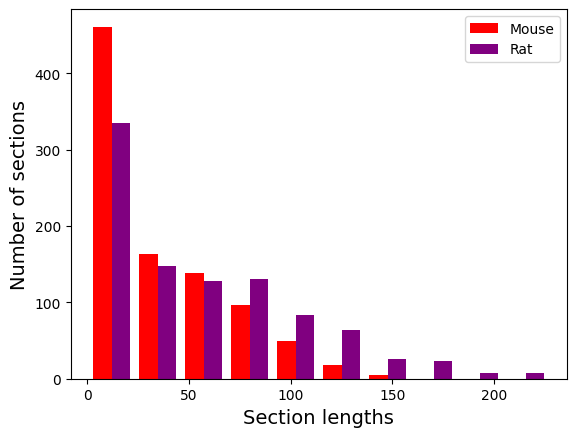

In [14]:
plt.hist([section_lengthsM, section_lengthsR], color=['red', 'purple'], label=['Mouse', 'Rat'])
_ = plt.legend()
_ = plt.xlabel('Section lengths', fontsize=14)
_ = plt.ylabel('Number of sections', fontsize=14)

### Comparison of two distributions 

Then we can perform statistical tests to determine how different the two distributions are. 

In [15]:
from scipy import stats

In [16]:
stats.ks_2samp(section_lengthsR, section_lengthsM)

KstestResult(statistic=np.float64(0.180006395143294), pvalue=np.float64(7.946561907728339e-14), statistic_location=np.float64(67.85025787353516), statistic_sign=np.int8(-1))